In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from brian2.units import *
import matplotlib as mlib
from scipy import stats

from simulation_statistics.analysis_functions_definitions import *

In [37]:
mlib.rcParams.update({'font.size': 22})
mlib.rcParams.update({'errorbar.capsize': 2})

In [34]:
# data = np.load("D:/Work/Neurogenesis-PhD/simulation_statistics/batch_analysis_141919_21122017.npz")
# metadata = np.load("D:/Work/Neurogenesis-PhD/simulation_statistics/batch_ec0028a3a19c60e1b1ae0c57088d6c0c.npz")
data=np.load("case_1_600k/case_1_600k.npz")
# print data['recording_archive_name']
ff_last = data['final_pre_weights']
lat_last = data['final_post_weights']
init_ff_weights = data['init_ff_connections']
init_lat_weights = data['init_lat_connections']
ff_init = data['init_ff_connections']
lat_init = data['init_lat_connections']
simdata = np.array(data['sim_params']).ravel()[0]
grid = simdata['grid']
N_layer = grid[0] * grid[1]
n = int(np.sqrt(N_layer))
g_max = simdata['g_max']
s_max = simdata['s_max']
sigma_form_forward = simdata['sigma_form_forward']
sigma_form_lateral = simdata['sigma_form_lateral']
p_form_lateral = simdata['p_form_lateral']
p_form_forward = simdata['p_form_forward']
p_elim_dep = simdata['p_elim_dep']
p_elim_pot = simdata['p_elim_pot']
f_rew = simdata['f_rew']

In [35]:
# LAT connection bar chart
last_conn, last_weight = list_to_post_pre(ff_last, lat_last,
                                                  s_max, N_layer)
init_conn, init_weight = list_to_post_pre(ff_init, lat_init,
                                          s_max, N_layer)

init_fan_in_rec = fan_in(init_conn, init_weight, 'conn', 'rec')

mean_projection_rec, means_and_std_devs_rec, \
means_for_plot_rec, mean_centred_projection_rec = centre_weights(
    init_fan_in_rec, 16)

init_fan_in_rec_rad = radial_sample(mean_projection_rec, 100)

final_fan_in_rec = fan_in(last_conn, last_weight, 'weight',
                          'rec')

final_mean_projection_rec, final_means_and_std_devs_rec, \
final_means_for_plot_rec, final_mean_centred_projection_rec = centre_weights(
    final_fan_in_rec, 16)

final_fan_in_rec_rad = \
    radial_sample(final_mean_projection_rec, 100)

final_fan_in_rec_conn = fan_in(last_conn, last_weight, 'conn',
                               'rec')

final_mean_projection_rec_conn, final_means_and_std_devs_rec_conn, \
final_means_for_plot_rec_conn, final_mean_centred_projection_rec_conn = centre_weights(
    final_fan_in_rec_conn, 16)

final_fan_in_rec_rad_conn = \
    radial_sample(final_mean_projection_rec_conn, 100)

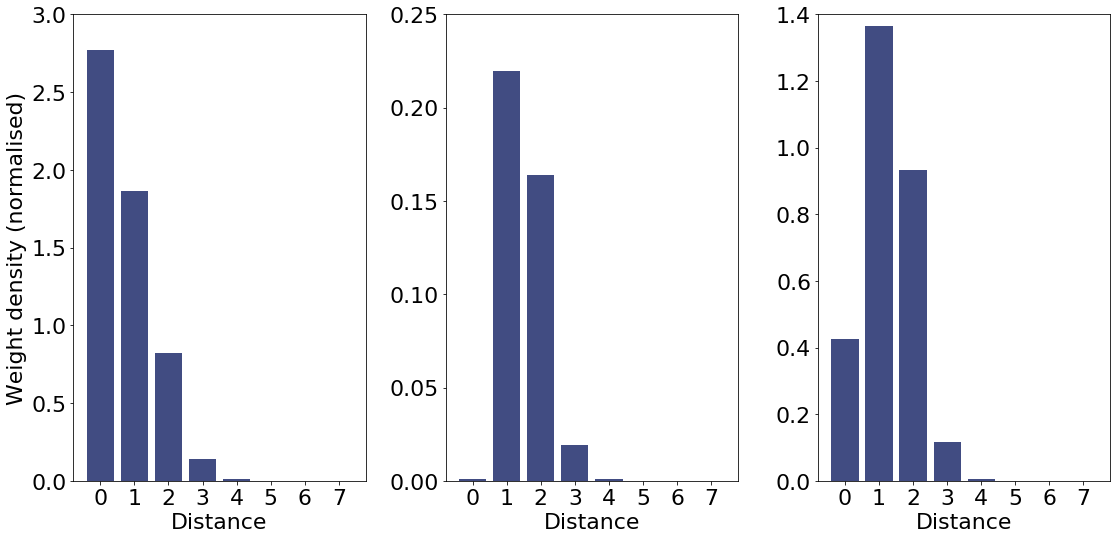

In [38]:
plt.figure(figsize=(16, 8), dpi=800)
plt.subplot(1, 3, 1)
# plt.suptitle("Distance between input and target neurons for lateral connections")
plt.bar(range(8), init_fan_in_rec_rad, color='#414C82')
plt.ylim([0, 3.])
# plt.ylim([0, 3])
plt.xticks(range(8))
plt.xlabel("Distance")
plt.ylabel("Weight density (normalised)")
plt.subplot(1, 3, 2)
plt.xticks(range(8))
plt.ylim([0, .25])
plt.bar(range(8), final_fan_in_rec_rad, color='#414C82')
plt.xlabel("Distance")
plt.subplot(1, 3, 3)
plt.xticks(range(8))
plt.bar(range(8), final_fan_in_rec_rad_conn, color='#414C82')
plt.xlabel("Distance")
plt.ylim([0, 1.4])
plt.tight_layout()

plt.savefig("lateral_weight_density.png")